In [1]:
import scanpy as sc
from sklearn import metrics

In [95]:
import pandas as pd

type_data = [['endoderm anlage', 'endoderm primordium'],
        ['endoderm primordium', 'AMP/EE progenitors'],
        ['AMP/EE progenitors', 'adult midgut precursors'],
        ['AMP/EE progenitors', 'entero-endocrine cells'],
        ['endoderm primordium', 'midgut primordium'],
        ['midgut primordium', 'midgut chamber 1 early'],
        ['midgut chamber 1 early', 'midgut chamber 1 late'],
        ['midgut chamber 1 early', 'copper cells early'],
        ['copper cells early', 'copper cells late'],
        ['midgut primordium', 'midgut chamber 2 early'],
        ['midgut chamber 2 early', 'midgut chamber 2 late'],
        ['midgut chamber 2 late', 'gastric caecum'],
        ['midgut primordium', 'midgut chamber 3 early'],
        ['midgut chamber 3 early', 'midgut chamber 3 late'],
        ['midgut primordium', 'enterocytes early'],
        ['enterocytes early', 'enterocytes 1 mid'],
        ['enterocytes 1 mid', 'enterocytes 1 late'],
        ['enterocytes early', 'enterocytes 2 mid early'],
        ['enterocytes 2 mid early', 'enterocytes 2 mid late'],
        ['enterocytes 2 mid late', 'enterocytes 2 late']]
paired_cluster = pd.DataFrame(type_data, columns=['Start_cluster', 'End_cluster'])

In [6]:
endoderm_data = sc.read_h5ad('/mnt/d/dailywork/lineage/endoderm/coembed_germ_layer_endoderm.h5ad')

In [7]:
endoderm_data

AnnData object with n_obs × n_vars = 29647 × 16725
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'seurat_clusters', 'infer_age', 'infer_age_int', 'sub_cluster_number', 'subtype', 'subtype_exclude', 'tissue', 'germ_layer', 'RNA_snn_res.1.2', 'assay', 'timeslot', 'subtype_new'
    var: 'name'
    obsm: 'X_pca', 'X_umap'

/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


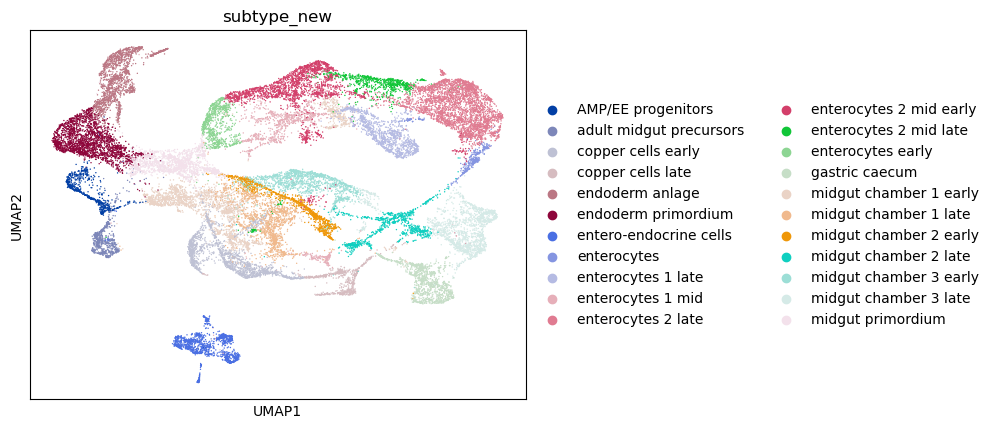

In [10]:
sc.pp.neighbors(endoderm_data)
sc.pl.umap(endoderm_data, color='subtype_new')

In [98]:
import numpy as np

# copy raw data and reset the index for its order
data_try = endoderm_data.obs.copy().reset_index()

# create a dataframe to store the score of paired clusters
paired_score = pd.DataFrame(columns=['Source', 'Target', 'Weight'])

# construct a circulation to calculate the score of paired clusters
for i in range(len(paired_cluster)):
    paired_labels = data_try[np.in1d(data_try['subtype_new'], [paired_cluster.loc[i][0], paired_cluster.loc[i][1]])]['subtype_new']
    paired_data = endoderm_data.obsm['X_umap'][[data_try[np.in1d(data_try['subtype_new'], [paired_cluster.loc[i][0], paired_cluster.loc[i][1]])].index.tolist()]]
    score = metrics.silhouette_score(paired_data, paired_labels)
    paired_score.loc[i] = [paired_cluster.loc[i][0], paired_cluster.loc[i][1], score]


/tmp/ipykernel_313/3383801757.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  paired_data = endoderm_data.obsm['X_umap'][[data_try[np.in1d(data_try['subtype_new'], [paired_cluster.loc[i][0], paired_cluster.loc[i][1]])].index.tolist()]]


/tmp/ipykernel_313/3383801757.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  paired_data = endoderm_data.obsm['X_umap'][[data_try[np.in1d(data_try['subtype_new'], [paired_cluster.loc[i][0], paired_cluster.loc[i][1]])].index.tolist()]]
/tmp/ipykernel_313/3383801757.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  paired_data = endoderm_data.obsm['X_umap'][[data_try[np.in1d(data_try['subtype_new'], [paired_cluster.loc[i][0], paired_cluster.loc[i][1]])].index.tolist()]]
/tmp/ipykernel_313/3383801757.py:12: FutureWarning: Using a no

In [100]:
paired_score.to_csv('/mnt/c/Users/ouyangkang/Desktop/endoderm.csv', index=None)